In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from transit_periodogram import transit_periodogram

In [4]:
from astropy.io import fits as pyfits

In [5]:
f = pyfits.open("https://archive.stsci.edu/hlsps/everest/v2/c12/246100000/99087/"
                "hlsp_everest_k2_llc_246199087-c12_kepler_v2.0_lc.fits")

In [6]:
flux = f[1].data['flux']
time = f[1].data['time']
mask = np.isfinite(flux)
time = time[mask]
flux = flux[mask]

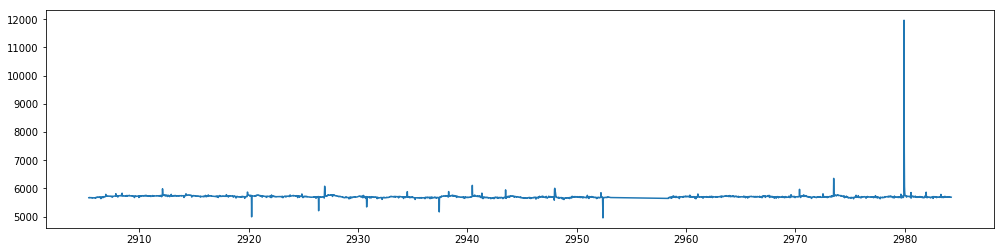

In [7]:
plt.figure(figsize=[17, 4])
plt.plot(time, flux)

In [8]:
from lightkurve import LightCurve

In [9]:
lc = LightCurve(time=time, flux=flux)

In [10]:
lc = lc.remove_outliers() # remove_flares

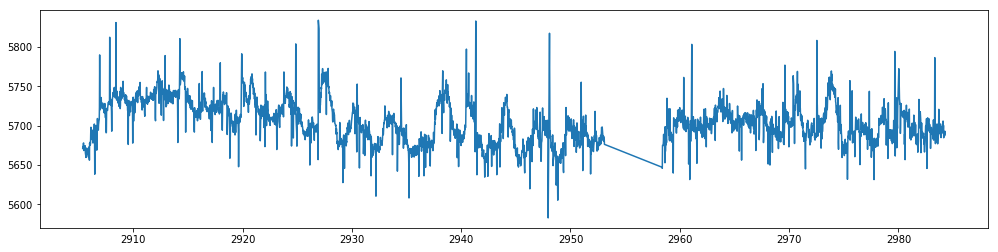

In [11]:
plt.figure(figsize=[17, 4])
plt.plot(lc.time, lc.flux)

In [12]:
flat, trend = lc.flatten(return_trend=True, window_length=101)

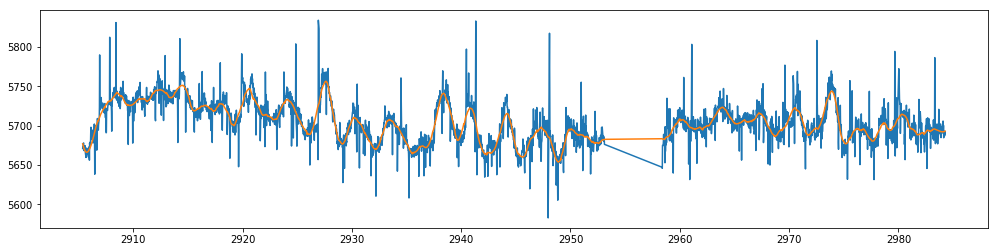

In [14]:
plt.figure(figsize=[17, 4])
plt.plot(lc.time, lc.flux)
plt.plot(trend.time, trend.flux)

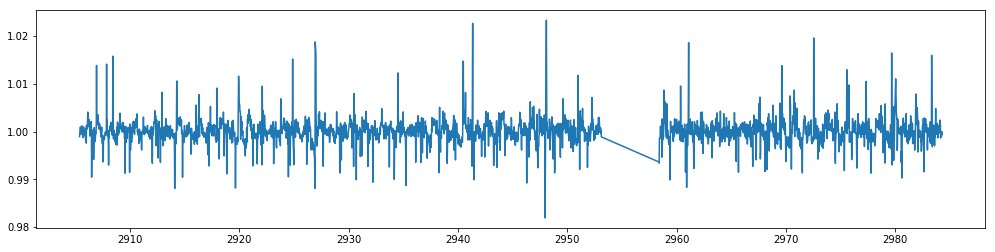

In [15]:
plt.figure(figsize=[17, 4])
plt.plot(flat.time, flat.flux)

In [16]:
trial_periods = np.logspace(np.log10(.5), np.log10(20.), 20000)
durations = np.logspace(np.log10(.01), np.log10(.4), 200)

In [17]:
periods, obj, _, _, _, _, phase, duration = transit_periodogram(flat.time, flat.flux, trial_periods,
                                                                durations, method='likelihood')

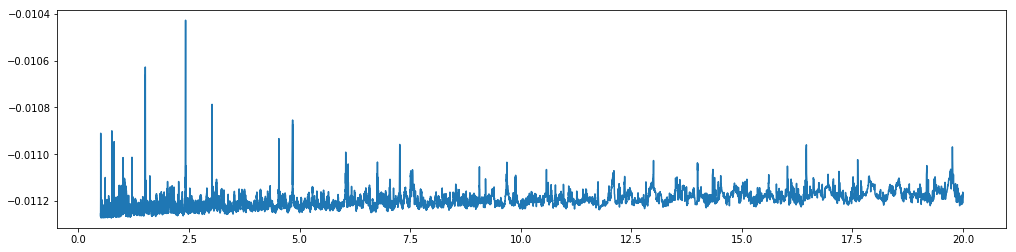

In [18]:
plt.figure(figsize=[17, 4])
plt.plot(periods, obj)

In [19]:
periods[np.argmax(obj)]

2.4221739239255031

In [20]:
duration[np.argmax(obj)]

0.040000000000000001

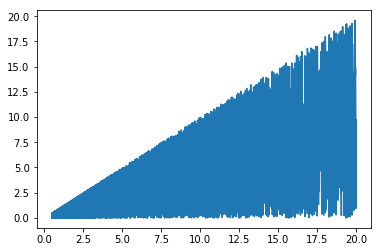

In [21]:
plt.plot(periods, phase)

In [22]:
folded = flat.fold(period=periods[np.argmax(obj)], phase=phase[np.argmax(obj)])

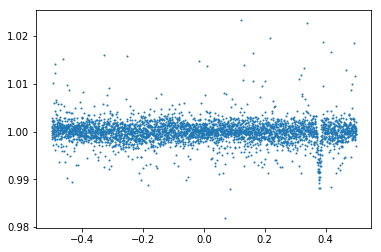

In [23]:
plt.plot(folded.time, folded.flux, 'o', markersize=1)